<a href="https://colab.research.google.com/github/MK316/workshops/blob/main/20230126_yonsei%5CWhat_is_Sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📘 Topic: Written language vs. Spoken language



## ✅ 1. The memory size

Texts and audio as digital data:  
e.g., written "one" vs. spoken "one"

1 KB = 1,024 bytes  
1 MB =  (1,024)² = 1,048,576 bytes  
1 GB = (1,024)³

In [49]:
#@markdown Memory size of words:
import sys

ask = input("Type anything and I'll tell you the memory size of it.")

size = sys.getsizeof(ask)
print('The size: %s byte'%size)

Type anything and I'll tell you the memory size of it.one
The size: 52 byte


+ 💾 Download [audiofile](https://github.com/MK316/workshops/blob/main/20230126_yonsei/data/one.wav?raw=true) and rename it as "one.wav" (0.65 sec.)

In [51]:
#@markdown 🚩 Upload the audio file: one.wav
from google.colab import files
uploaded = files.upload()

x1 = 64496/52

print('Spoken data is %d times larger than the written one'%x1)

Saving one.wav to one.wav
Spoken data is 1240 times larger than the written one


## ✅ 2. Understanding sound wave

### [1] [Videolink](https://www.youtube.com/watch?v=aPswnDcteS4) (22 seconds)

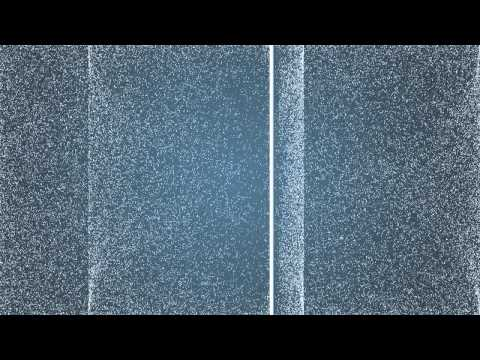

In [52]:
#@markdown Visible waves: This is a visualisation of sound waves caused by a moving string.
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("aPswnDcteS4", width=500)
display(video)

### [2] Simple vs. complex sounds (=speech sounds)

  + 위상(Phase; Degress of displacement)
  + 진폭(Amplitude; Intensity)
  + 주파수(Frequency)

![](https://miro.medium.com/max/700/0*QFVha2lCgyhKjhuO.gif)





### [3] Creating sounds

In [46]:
#@markdown A. Creating simple waves:

from ipywidgets import interact, FloatSlider
from numpy import sin, pi, arange, real, imag

def plot_oscillation(amplitude=5, frequency=5, theta=1):
    sampling_frequency=500
    time = arange(-1, 1 + 1/sampling_frequency, 1/sampling_frequency)
    simulation = amplitude * sin(2 * pi * frequency * time + theta)

    fig = plt.figure(figsize=(20, 4))
    gs = plt.GridSpec(1, 6, left=0.05, right=0.48, wspace=0.05)
    ax1 = fig.add_subplot(gs[0, :4])
    ax1.plot(time, simulation, linewidth=2)
    ax1.set_ylabel('Amplitude', fontsize=18)
    ax1.set_xlabel('Time', fontsize=18)
    ax2 = fig.add_subplot(gs[0, 5:], polar=True)
    ax2.plot(real(simulation), imag(simulation))
    plt.tight_layout()

interact(plot_oscillation, amplitude=FloatSlider(value=5, min=0, max=10, step=0.5),
         frequency=FloatSlider(value=5, min=0, max=10, step=0.5), 
         theta=FloatSlider(value=0, min=-5, max=5, step=0.5))

interactive(children=(FloatSlider(value=5.0, description='amplitude', max=10.0, step=0.5), FloatSlider(value=5…

<function __main__.plot_oscillation(amplitude=5, frequency=5, theta=1)>

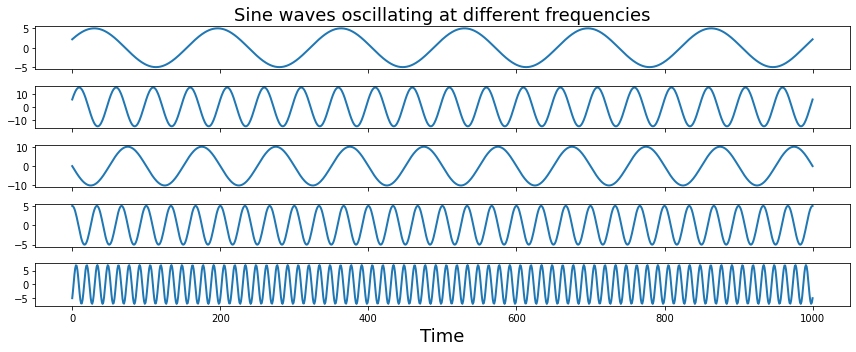

In [47]:
#@markdown B. Creating multiple simple waves: Sampling rate = 500 HZ

sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()

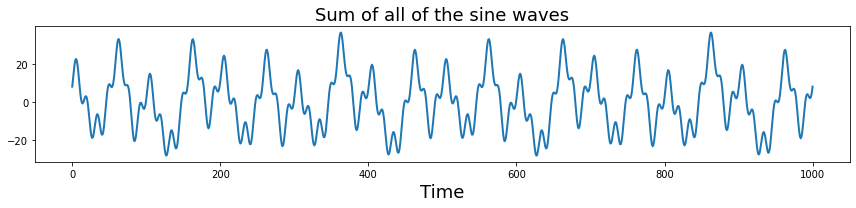

In [53]:
#@markdown C. Let's add all of those signals together to get a more complex signal.
plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()

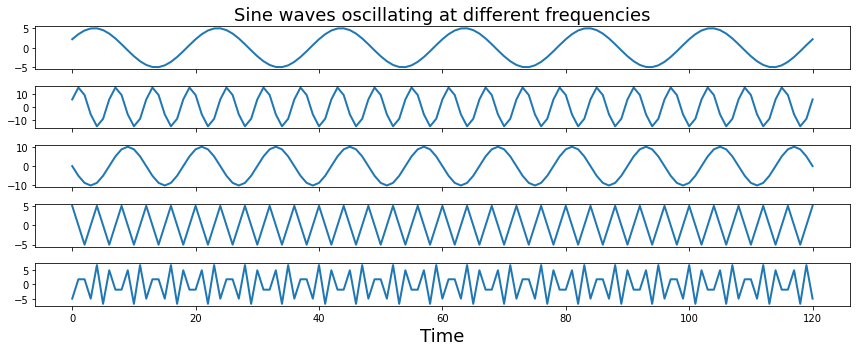

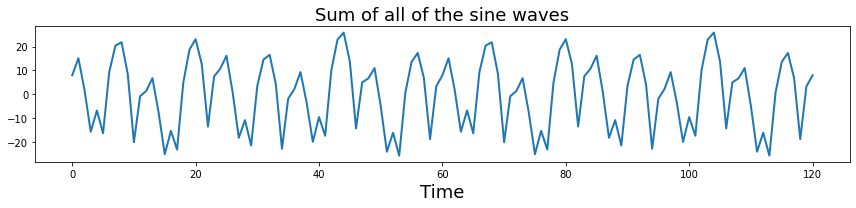

In [54]:
#@markdown D. Downsampling from 500 to 60 Hz (downsampling)

sampling_freq = 60

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()    


plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()    


Text(0.5, 0, 'Time')

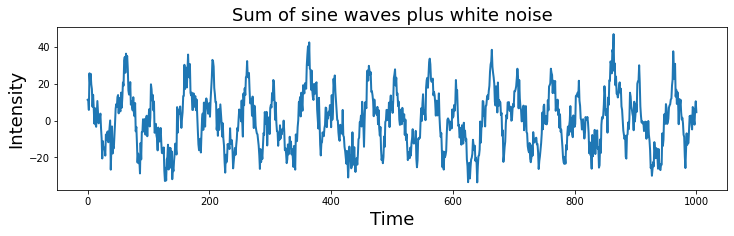

In [55]:
#@markdown E. More realistic sound waves (with Gaussian white noise = closer to real speech sound)
sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


noise = 5 * np.random.randn(sine_waves.shape[1])
signal = np.sum(sine_waves,axis=0) + noise

plt.figure(figsize=(12,3))
plt.plot( signal, linewidth=2)
plt.title("Sum of sine waves plus white noise", fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

## ✅ 3. Speech analysis

# 🍎 References


1. [Signal Processing](https://colab.research.google.com/github/ljchang/dartbrains/blob/master/content/Signal_Processing.ipynb#scrollTo=BcsjBMJGhoh3)

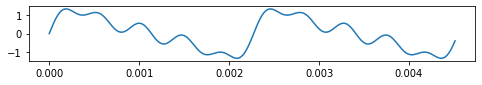

In [44]:
#@markdown Complex waves (e.g., speech sounds)

import matplotlib.pyplot as plt
import IPython
import numpy as np

samplerate=44100
duration=3 #secondes
t=np.linspace(0,duration,duration*samplerate)

harmonics=[2,3,5]
hamonics_intensity=[1/2,1/4,1/3]

signal =  np.sin(2 * np.pi * 440 * t)
"""ajout des harmoniques"""
for h,h_i in zip(harmonics,hamonics_intensity):
    signal+= h_i*np.sin(h* 2 * np.pi * 440 * t )

fig,ax=plt.subplots(figsize=(8,1))
ax.plot(t[:200],signal[:200]);